# Superposed deformation

To understand deformation defined as superposition of two individual deformations $\mathbf{F_1}$ and $\mathbf{F_2}$, we can start to think about applying deformation on already deformed object,so:

$$ x=\mathbf{F_2}\left(\mathbf{F_1}X\right)=\left(\mathbf{F_2}\mathbf{F_1}\right)X = \mathbf{F}X$$

where $\mathbf{F}=\mathbf{F_2}\mathbf{F_1}$, i.e. superposition of deformation could be treated as left multiplication of deformation gradients, where first deformation gradient is on right side and late on left side. 

To demonstrate difference in order, we can explore superposition of pure shear and simple shear:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
PS = array([[2, 0], [0, 0.5]])
SS = array([[1, 1], [0, 1]])

In [3]:
# simple shear first
dot(PS, SS)

array([[ 2. ,  2. ],
       [ 0. ,  0.5]])

In [4]:
# pure shear first
dot(SS, PS)

array([[ 2. ,  0.5],
       [ 0. ,  0.5]])

## Small deformations

Using above described concept, we can imagine that any deformation is composed from small deformation increments superposed on each other. So lets demonstrate how small increments of pure shear and simple shear accumulate with increasing amounts of steps. For this purpose we define incremental simple shear with $\gamma=0.01$ and pure shear increment with $S_x=1.01$ and we will use `numpy.linalg.matrix_power` function to calculate total deformation.

In [5]:
PSi = array([[1.01, 0], [0, 1/1.01]])
SSi = array([[1, 0.01], [0, 1]])

$$\mathbf{F} = \underset{n \mathrm{\, times}}{\mathbf{F_i}\mathbf{F_i}\cdots\mathbf{F_i}} = \mathbf{F_i}^n$$

In [6]:
matrix_power(PSi, 10)

array([[ 1.10462213,  0.        ],
       [ 0.        ,  0.90528695]])

In [7]:
1.01**10

1.1046221254112045

So for pure shear accumulated stretch growths exponentially with increasing amounts of steps, while

In [8]:
matrix_power(SSi, 10)

array([[ 1. ,  0.1],
       [ 0. ,  1. ]])

In [9]:
10*1.01

10.1

for simple shear accumulated simple shear growths linearly with amounts of steps.

To see how intensity of deformation i.e. axial ratio of strain ellipse evolves with accumulation of pure shear or simple shear, we have to understand how to calculate axial ration of strain ellipse from deformation gradient.

In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix $\mathbf{F} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^*$. For deformation gradient, where $\mathbf{F}$ is an m × m real square matrix with positive determinant, $\mathbf{U}$, $\mathbf{V}^*$ and $\boldsymbol{\Sigma}$ are real m × m matrices as well, $\boldsymbol{\Sigma}$ can be regarded as a scaling matrix, and $\mathbf{U}$, $\mathbf{V}^*$ can be viewed as rotation matrices. Thus the expression $\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^*$ can be intuitively interpreted as a composition (or sequence) of three transformations: a rotation, a scaling, and another rotation. For instance, the figure above explains how a shear matrix can be described as such a sequence.
<img width="85%" src="images/svd_explained.png">

Knowing that and using `numpy.linalg.svd` function, we can define functions to calculate axial ratio or orientation of strain ellipse

In [10]:
# function to calculate axial ratio of strain ellipse
def axialratio(F):
    u,s,v = svd(F)
    return s[0]/s[1]
# function to calculate orientation of long axis of the strain ellipse (counterclockwise from horizontal)
def orientation(F):
    u,s,v = svd(F)
    return rad2deg(arctan2(u[1,0], u[0,0]))

In [11]:
F = array([[1, 1], [0, 1]])

In [12]:
axialratio(F)

2.6180339887498953

In [13]:
orientation(F)

31.717474411461009

Now we can visualize accumulation of deformation for pure shear and simple shear increments. Firstly we will defined range of increments to be plotted.

In [14]:
nrange = arange(1, 100)

Now we calculate axial ratios of accumulated pure shear

In [15]:
PSar = [axialratio(matrix_power(PSi, n)) for n in nrange]
SSar = [axialratio(matrix_power(SSi, n)) for n in nrange]

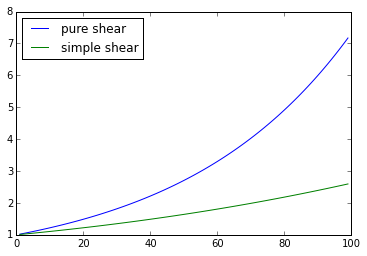

In [16]:
plot(nrange, PSar, label='pure shear')
plot(nrange, SSar, label='simple shear')
plt.legend(loc=2)

To visualize change of angle between long axis of strain ellipse and shear zone boundary during simple shear, we can use similar approach:

In [17]:
nrange = arange(1, 1000)
ang = [orientation(matrix_power(SSi, n)) for n in nrange]

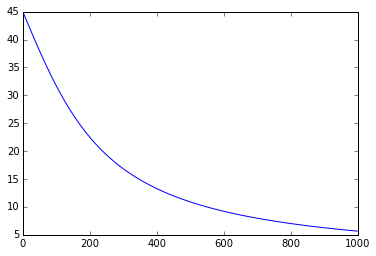

In [18]:
plot(nrange, ang)

In [19]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()